In [199]:
import numpy as np
from matplotlib import pyplot as plt
import random
from scipy.optimize import curve_fit
import scipy.stats as stats

We first write a function for a random walk with the given step function and a function which computes the root-mean-square value as a function of time. We also write Angela and Donald's functions

In [194]:
def mod_ran_walk(t,plot=False):
    '''Computes a random walk for t steps. 
        
        Inputs:
            t; int, # of steps in the random walk
            plot; bool, whether or not to plot the walk
        
        Returns:
            array with arr[0]=t, arr[1]=x(t), arr[2]=step(t)
    '''
    
    t_arr = np.arange(t)
    x = [0]*t
    steps = [0]*t
    
    for i in range(1,t):
        if ((i%8)==0): # +/- 3 step, every 8 steps
            ran3 = [-3,3][random.randrange(2)]
            x[i] = ran3 + x[i-1]
            steps[i] = ran3
        else: # +/- 1 step, other steps
            ran1 = [-1,1][random.randrange(2)] 
            x[i] = ran1 + x[i-1]
            steps[i] = ran1
    
    if (plot==True):
        plt.figure(figsize=(10,5))
        plt.plot(t_arr,x, linewidth=0.5)
        plt.title('Modified 1D random walk')
        plt.xlabel(r'$t$')
        plt.ylabel(r'$x$')
    
    plt.show()
        
    return [t_arr,x,steps]

def rms(w,t):
    '''Computes the root-mean-square value for w random walks with t steps.
        
        Inputs:
            w: int, # of walks
            t; int, # of steps
        
        Returns:
            array with arr[0]=t and arr[1]=x_rms(t)
    '''
    time = np.arange(t)
    tot_steps = [0]*t

    for i in range(w):
        t_arr,x,steps = mod_ran_walk(t)
        tot_steps += np.array([step**2 for step in steps]) # computes random walks and adds squared steps together
    
    avg_steps = tot_steps/w
    rms_arr = [0]*t
    
    for i in range(1,t):
        rms_arr[i] = np.sqrt(np.sum(avg_steps[:i-1])) # computes x_rms
    
    return [time,rms_arr]

def angela(t,epsilon): 
    '''Angela's function'''
    return np.sqrt(2*(0.5+epsilon))*t**0.5

def donald(t,delta): 
    '''Donald's function'''
    return t**(0.5+delta)
    

Here is an example of a random walk for 10,000 steps.

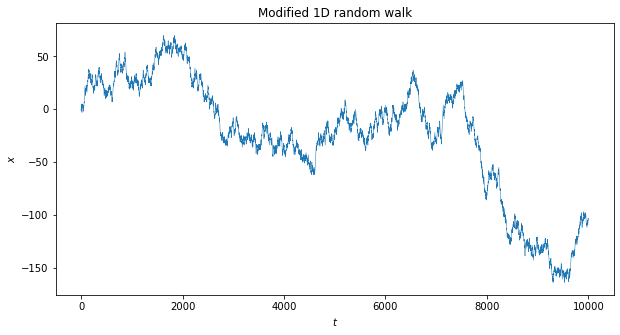

In [195]:
t=10000
walk = mod_ran_walk(t, plot=True)

We compute the root-mean-square value as a function of time for 1000 walks with 10000 steps and then fit the data to Angela and Donald's functions.

In [212]:
t,x_rms = rms(1000,10000)
eps_ang, pcov_ang = curve_fit(angela, t, x_rms, bounds=(0,0.5))
del_don, pcov_don = curve_fit(donald, t, x_rms, bounds=(0,0.5))

This yields the following plot.

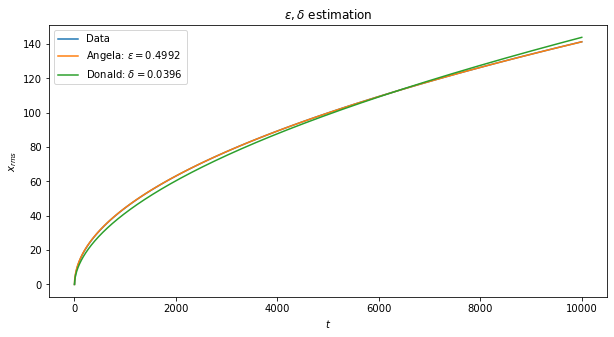

In [213]:
plt.figure(figsize=(10,5))
plt.plot(t,x_rms, label=r'Data')
ang_eqn = r'Angela: $\epsilon=$' + "{:.{}f}".format(eps_ang[0],4) 
plt.plot(t, angela(t,eps_ang), label=ang_eqn)
don_eqn = r'Donald: $\delta=$' + "{:.{}f}".format(del_don[0],4)
plt.plot(t, donald(t,del_don), label=don_eqn)
plt.title(r'$\epsilon,\delta$ estimation')
plt.xlabel(r'$t$')
plt.ylabel(r'$x_{rms}$')
plt.legend()
plt.show()

We estimate that Angela's function is better than Donald's since Angela's fit closely matches the data whereas Donald's fit deviates from the data. So that we don't have to squint to see this, we plot the difference between data and fits below.

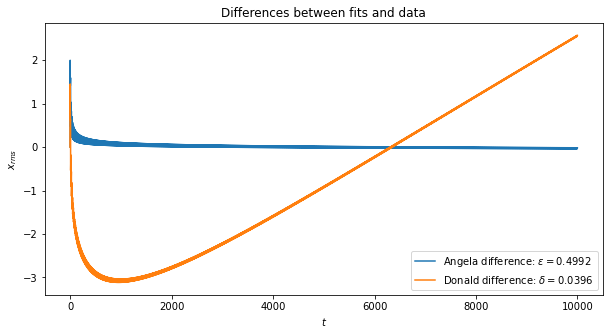

In [217]:
plt.figure(figsize=(10,5))
ang_eqn = r'Angela difference: $\epsilon=$' + "{:.{}f}".format(eps_ang[0],4) 
plt.plot(t, angela(t,eps_ang)-x_rms, label=ang_eqn)
don_eqn = r'Donald difference: $\delta=$' + "{:.{}f}".format(del_don[0],4)
plt.plot(t, donald(t,del_don)-x_rms, label=don_eqn)
plt.title('Differences between fits and data')
plt.xlabel(r'$t$')
plt.ylabel(r'$x_{rms}$')
plt.legend()
plt.show()

It is now quite obvious that Angela's fit is superior to Donald's.